### POC (Proof of Concept)
Vamos criar um sistema de controle fuzzy que modela como você pode escolher dar ajuda a algum streamer de jogos em um site de Streamers. Ao dar ajuda ao canal, você considera a habilidade do jogador e a carisma do jogador, classificados entre 0 e 10. Você usa isso para deixar uma ajuda monetária ao canal do jogador entre 0 e 25%.

Nós formularíamos este problema como:

Variáveis de Entrada

**Habilidade do jogador**
* Universo (ou seja, faixa de valores nítidos): Como foi bom a habilidade do jogador, em uma escala de 0 a 10?
* Conjunto difuso (ou seja, intervalo de valores difusos): ruim, mediano, ótimo

**Carisma do jogador**
* Universo: Carisma do jogador, numa escala de 0 a 10?
* Conjunto difuso: ruim, decente, ótimo
 Variável de Saída

**Ajuda financeira ao canal**
* Universo: quanto devemos dar de ajuda financeira ao canal, numa escala de 0% a 25%
* Conjunto difuso: baixo, médio, alto

Regras
* Se a habilidade foi boa ou a carisma do jogador era alta, então a ajuda financeira será alta.
* Se a habilidade foi mediana, então a ajuda financeira será média.
* Se a habilidade foi ruim e o carisma do jogador foi ruim, então a ajuda financeira será baixa.

#### Importando pacotes

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
#matplotlib.use('TkAgg')
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [21]:
# Gerar variáveis do universo 
# * Qualidade e carisma em faixas subjetivas [0, 10] 
# * A ajuda tem um intervalo de [0, 25] em unidades de pontos percentuais 

print("Entre com a nota de habilidade")
input_habilidade = float(input("Nota de Habilidade: "))
print("\nEntre com a nota de carisma")
input_carisma = float(input("Nota de carisma: "))

habilidade = np.arange(0, 11, 1)
print("\nhabilidade do jogador\n",habilidade)
carisma = np.arange(0, 11, 1)
print("\ncarisma do jogador\n",carisma)
ajuda  = np.arange(0, 26, 1)
print("\najuda financeira ao jogador\n",ajuda)

Entre com a nota de habilidade
Nota de Habilidade: 5.3

Entre com a nota de carisma
Nota de carisma: 8.2

habilidade do jogador
 [ 0  1  2  3  4  5  6  7  8  9 10]

carisma do jogador
 [ 0  1  2  3  4  5  6  7  8  9 10]

ajuda financeira ao jogador
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]


#### Função de pertinência para habilidade do jogador

In [22]:
habilidade_baixa = fuzz.trimf(habilidade, [0, 0, 5])
print("habilidade_baixa\n",habilidade_baixa)
habilidade_media = fuzz.trimf(habilidade, [0, 5, 10])
print("\nhabilidade_media\n",habilidade_media)
habilidade_alta = fuzz.trimf(habilidade, [5, 10, 10])
print("\nhabilidade_alta\n",habilidade_alta)

habilidade_baixa
 [1.  0.8 0.6 0.4 0.2 0.  0.  0.  0.  0.  0. ]

habilidade_media
 [0.  0.2 0.4 0.6 0.8 1.  0.8 0.6 0.4 0.2 0. ]

habilidade_alta
 [0.  0.  0.  0.  0.  0.  0.2 0.4 0.6 0.8 1. ]


#### Função de pertinência para o carisma do jogador

In [23]:
carisma_baixo = fuzz.trimf(carisma, [0, 0, 5])
print("carisma baixo\n",carisma_baixo)
carisma_medio = fuzz.trimf(carisma, [0, 5, 10])
print("\ncarisma médio\n",carisma_medio)
carisma_alto = fuzz.trimf(carisma, [5, 10, 10])
print("\ncarisma alto\n",carisma_alto)

carisma baixo
 [1.  0.8 0.6 0.4 0.2 0.  0.  0.  0.  0.  0. ]

carisma médio
 [0.  0.2 0.4 0.6 0.8 1.  0.8 0.6 0.4 0.2 0. ]

carisma alto
 [0.  0.  0.  0.  0.  0.  0.2 0.4 0.6 0.8 1. ]


#### Função de pertinência para a ajuda financeira ao canal

In [24]:
ajuda_baixa = fuzz.trimf(ajuda, [0, 0, 13])
print("ajuda financeira baixa\n",ajuda_baixa)
ajuda_media = fuzz.trimf(ajuda, [0, 13, 25])
print("\najuda financeira media\n",ajuda_media )
ajuda_alta = fuzz.trimf(ajuda, [13, 25, 25])
print("\najuda financeira alta\n",ajuda_alta)

ajuda financeira baixa
 [1.         0.92307692 0.84615385 0.76923077 0.69230769 0.61538462
 0.53846154 0.46153846 0.38461538 0.30769231 0.23076923 0.15384615
 0.07692308 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]

ajuda financeira media
 [0.         0.07692308 0.15384615 0.23076923 0.30769231 0.38461538
 0.46153846 0.53846154 0.61538462 0.69230769 0.76923077 0.84615385
 0.92307692 1.         0.91666667 0.83333333 0.75       0.66666667
 0.58333333 0.5        0.41666667 0.33333333 0.25       0.16666667
 0.08333333 0.        ]

ajuda financeira alta
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.08333333 0.16666667 0.25       0.33333333
 0.41666667 0.5        0.58333333 0.66666667 0.75       0.83333333
 0.91666667 1.        ]


#### visualizando os univeros e as funções de pertinência

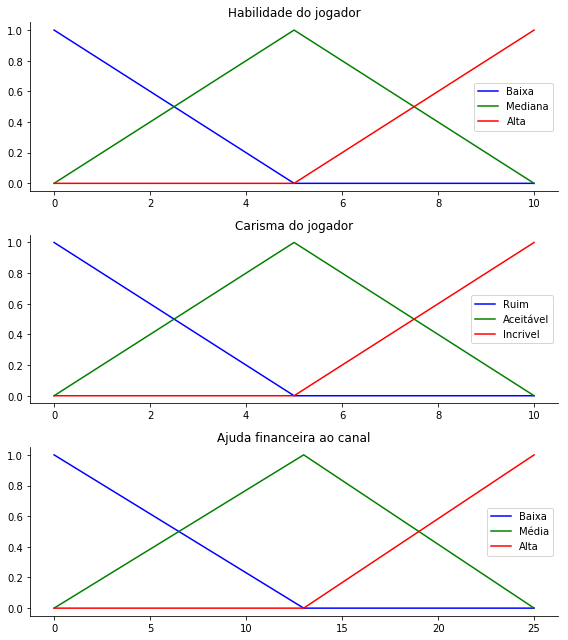

In [25]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(habilidade, habilidade_baixa, 'b', linewidth=1.5, label='Baixa')
ax0.plot(habilidade, habilidade_media, 'g', linewidth=1.5, label='Mediana')
ax0.plot(habilidade, habilidade_alta, 'r', linewidth=1.5, label='Alta')
ax0.set_title('Habilidade do jogador')
ax0.legend()

ax1.plot(carisma, carisma_baixo, 'b', linewidth=1.5, label='Ruim')
ax1.plot(carisma, carisma_medio, 'g', linewidth=1.5, label='Aceitável')
ax1.plot(carisma, carisma_alto, 'r', linewidth=1.5, label='Incrivel')
ax1.set_title('Carisma do jogador')
ax1.legend()

ax2.plot(ajuda, ajuda_baixa, 'b', linewidth=1.5, label='Baixa')
ax2.plot(ajuda, ajuda_media, 'g', linewidth=1.5, label='Média')
ax2.plot(ajuda, ajuda_alta, 'r', linewidth=1.5, label='Alta')
ax2.set_title('Ajuda financeira ao canal')
ax2.legend()

for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

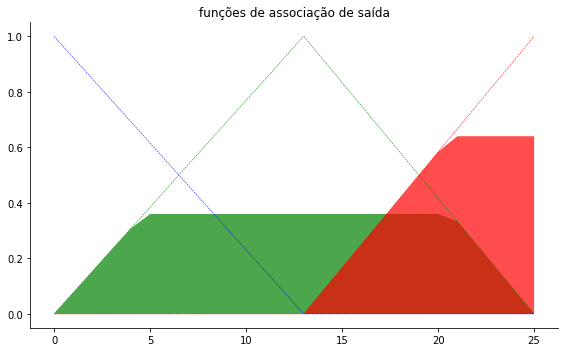

In [26]:
# Precisamos da ativação de nossas funções de participação fuzzy nesses valores. 
# Os valores exatos input_habilidade e input_carisma não existem em nossos universos ... 
habilidade_level_bx = fuzz.interp_membership(habilidade, habilidade_baixa, input_habilidade)
habilidade_level_md = fuzz.interp_membership(habilidade, habilidade_media, input_habilidade)
habilidade_level_at = fuzz.interp_membership(habilidade, habilidade_alta, input_habilidade)

carisma_level_bx = fuzz.interp_membership(carisma, carisma_baixo, input_carisma)
carisma_level_md = fuzz.interp_membership(carisma, carisma_medio, input_carisma)
carisma_level_at = fuzz.interp_membership(carisma, carisma_alto, input_carisma)

# Agora tomamos nossas regras e as aplicamos. A regra 1 diz respeito habilidade ruim OU carisma. 
# O operador OR significa que tiramos o máximo desses dois. 
active_rule1 = np.fmax(habilidade_level_bx, carisma_level_bx)

# Agora nós aplicamos isto cortando a parte superior da função de associação de saída # correspondente com `np.fmin`
ajuda_activation_bx = np.fmin(active_rule1, ajuda_baixa)  # removido inteiramente para 0 

# Para a regra 2, conectamos o carisma aceitável para ajuda media
ajuda_activation_md = np.fmin(carisma_level_md, ajuda_media)

# Para a regra 3, conectamos habilidade alta OU carisma alto com alta inclinação 
active_rule3 = np.fmax(habilidade_level_at, carisma_level_at)
ajuda_activation_hi = np.fmin(active_rule3, ajuda_alta)
ajuda0 = np.zeros_like(ajuda)

fig, ax0 = plt.subplots(figsize=(8, 5))

ax0.fill_between(ajuda, ajuda0, ajuda_activation_bx, facecolor='b', alpha=0.7)
ax0.plot(ajuda, ajuda_baixa, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(ajuda, ajuda0, ajuda_activation_md, facecolor='g', alpha=0.7)
ax0.plot(ajuda, ajuda_media, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(ajuda, ajuda0, ajuda_activation_hi, facecolor='r', alpha=0.7)
ax0.plot(ajuda, ajuda_alta, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('funções de associação de saída')

for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

#### Agregação de regras
Com a atividade de cada função de participação de saída conhecida, todas as funções de associação de saída devem ser combinadas. Isso geralmente é feito usando um operador máximo. Essa etapa também é conhecida como agregação .

### Defuzzificação
Finalmente, para obter uma resposta do mundo real, voltamos à lógica nítida do mundo das funções de participação difusa. Para os propósitos deste exemplo, o método centróide será usado.

In [29]:
# Agrega todas as três funções de associação de saída juntas 
aggregated = np.fmax(ajuda_activation_bx,
                     np.fmax(ajuda_activation_md, ajuda_activation_hi))

# Calcula o resultado da defuzzificação
ajuda1 = fuzz.defuzz(ajuda, aggregated, 'centroid')
print("\n",ajuda1)
ajuda_activation = fuzz.interp_membership(ajuda, aggregated, ajuda1)  


 15.051807794647045


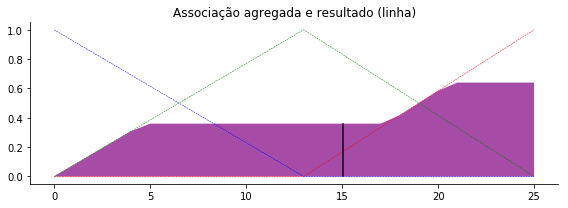

In [32]:
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(ajuda, ajuda_baixa, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(ajuda, ajuda_media, 'g', linewidth=0.5, linestyle='--')
ax0.plot(ajuda, ajuda_alta, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(ajuda, ajuda0, aggregated, facecolor='purple', alpha=0.7)
ax0.plot([ajuda1, ajuda1], [0, ajuda_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Associação agregada e resultado (linha)')
 
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()